In [44]:
import gym
import gym_maze
import time
import random
import numpy
import matplotlib.pyplot as plt

In [45]:
def select_action(Q, s, epsilon = 1):
    if(random.random() <= epsilon):
        return random.randint(0, 3)
    else:
        action = 0
        for i in range(4):
            if Q[s][i] > Q[s][action]:
                action = i
                
        return i

In [46]:
def map_state(state, n):
    return state[1] * n + state[0] 

In [47]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

# Define the maximum number of iterations
NUM_EPISODES = 1000000
n = 10
learning_rate = 0.01
gamma = 0.9
epsilon = 1
Q = {}

for i in range(100):
    Q[i] = [0 for j in range(4)]

state = observation
success_indices = []

for episode in range(NUM_EPISODES):
    #env.render()

    # TODO: Implement the agent policy here
    # Note: .sample() is used to sample random action from the environment's action space

    # Choose an action (Replace this random action with your agent's policy)
    mapped_state = map_state(state, n)
    action = select_action(Q, mapped_state, episode)
    epsilon -= (1 / NUM_EPISODES)
    
    # Perform the action and receive feedback from the environment
    next_state, reward, done, truncated = env.step(action)
    mapped_next_state = map_state(next_state, n)
    Q[mapped_state][action] += learning_rate * (reward + gamma * max(Q[mapped_next_state]) - Q[mapped_state][action])
    
    state = next_state
    if done or truncated:
        observation = env.reset()
        state = observation
        print(f"{episode} won")
    

# Close the environment
env.render()
time.sleep(10)
env.close()

2089 won
2197 won
5068 won
7540 won
8816 won
11736 won
13164 won
15936 won
17610 won
18042 won
18803 won
19573 won
21413 won
21972 won
22058 won
23129 won
27512 won
28833 won
30338 won
30756 won
31497 won
32564 won
34137 won
36443 won
37940 won
39882 won
41500 won
41910 won
44749 won
45881 won
48475 won
52094 won
57141 won
58245 won
59922 won
60805 won
63994 won
67753 won
69721 won
70158 won
71985 won
74266 won
75504 won
78246 won
78832 won
78899 won
79423 won
84239 won
85505 won
88349 won
91106 won
91774 won
92014 won
92988 won
101725 won
103630 won
103869 won
104579 won
105083 won
105579 won
107171 won
109161 won
112664 won
113262 won
117710 won
119497 won
125165 won
128439 won
128733 won
129469 won
129824 won
131527 won
136014 won
136619 won
138458 won
142155 won
142386 won
143711 won
144198 won
147259 won
150294 won
150560 won
151109 won
152481 won
152614 won
153692 won
153896 won
154070 won
157492 won
157868 won
158401 won
158784 won
160010 won
160962 won
162102 won
162316 won
162

In [49]:
pi = {}
V = {}

for state in range(100):
    mx = 0
    for i in range(4):
        if(Q[state][i] > Q[state][mx]):
            mx = i
            
    pi[state] = mx
    V[state] = Q[state][mx]

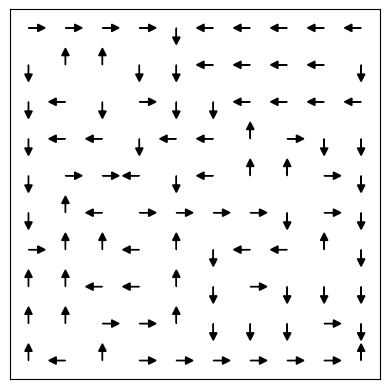

In [50]:
draw_grid(pi)

In [24]:
def draw_grid(directions, no_arrow_positions = []):
    rows = 10
    columns = 10
    cell_size = 1

    fig, ax = plt.subplots()

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            direction = directions.get(index, None)

            if direction is not None and index not in no_arrow_positions:
                x = col * cell_size + cell_size / 2
                y = (rows - 1 - row) * cell_size + cell_size / 2

                if direction == 0:  # Upward arrow
                    ax.arrow(x, y, 0, cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 2:  # Right arrow
                    ax.arrow(x, y, cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 1:  # Downward arrow
                    ax.arrow(x, y, 0, -cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 3:  # Left arrow
                    ax.arrow(x, y, -cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
            elif index in no_arrow_positions:
                c = 'black'
                if index == 47:
                    c = 'green'
                    
                ax.add_patch(plt.Rectangle((col, rows - 1 - row), 1, 1, color=c))

    ax.set_aspect('equal')
    ax.set_xlim(0, columns)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [25]:
def draw_values(data, cell_width=1, cell_height=1):
    # Prepare data for plotting
    values = [data.get(i, 0) for i in range(100)]

    # Reshape the values into a 4x12 grid
    grid_values = [values[i:i+10] for i in range(0, len(values), 10)]

    # Calculate the total size of the figure
    fig_width = 10 * cell_width
    fig_height = 10 * cell_height

    # Create the plot with specified figure size
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(grid_values, cmap='viridis', interpolation='nearest')

    # Add text annotations with values formatted to 3 decimal places
    for i in range(10):
        for j in range(10):
            plt.text(j, i, '{:.3f}'.format(grid_values[i][j]), ha='center', va='center', color='black')

    # Customize plot aesthetics
    plt.title('Grid Visualization')
    plt.colorbar(label='Values')
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.grid(visible=False)
    plt.show()

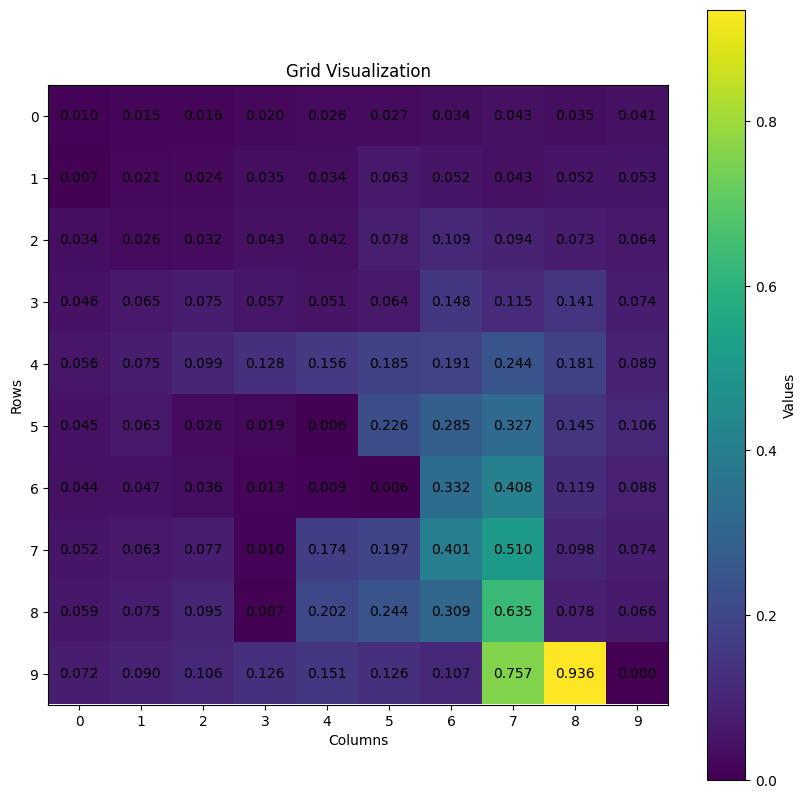

In [26]:
draw_values(V)

In [27]:
Q

{0: [0.009089821918434828,
  0.007218500206589351,
  0.010394869002907833,
  0.007626017530416557],
 1: [0.011743805369853857,
  0.014863480153388958,
  0.01370472555532047,
  0.011369310009807138],
 2: [0.013577029113041268,
  0.013535765120456086,
  0.015520473446853141,
  0.012532541325183185],
 3: [0.01736773143625815,
  0.01740595529239805,
  0.0200543503654279,
  0.014363450848275693],
 4: [0.021343131298287837,
  0.02582876161834347,
  0.02422418642345349,
  0.020481351798690813],
 5: [0.0236657463707663,
  0.024023645648095074,
  0.026871893928824744,
  0.022348445433187182],
 6: [0.029191384623971115,
  0.030153484304317253,
  0.03370522943651243,
  0.02536151286292841],
 7: [0.038366161200517425,
  0.038057903369400764,
  0.042904134237690114,
  0.03256682913337383],
 8: [0.03303418074712351,
  0.03315825469757111,
  0.03360295078264845,
  0.034993229207217105],
 9: [0.03805501872937356,
  0.03451236339223207,
  0.034390921413701064,
  0.04136318912881368],
 10: [0.0070414481